In [1]:
# Import Section
import csv
import codecs
import sys
import io
import numpy as np
import pandas as pd
import scipy as sp

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statistics import mean

from sklearn.ensemble import GradientBoostingRegressor

# Python script for confusion matrix creation. 
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_excel("Des_cod_1056_92-29.xlsx",index_col=0)

In [3]:
dataset.shape

(1056, 30)

In [4]:
x = dataset.drop(['Act'],axis=1).astype (float)
y = dataset['Act']

In [5]:
x.shape

(1056, 29)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state =47, shuffle=True)

In [7]:
x_test.shape

(212, 29)

In [8]:
x_train.shape

(844, 29)

In [9]:
regressor = GradientBoostingRegressor(n_estimators= 450, min_samples_split= 2, min_samples_leaf=3, max_depth=3,
                                     loss='ls', learning_rate= 0.15, criterion= 'mse', random_state=0)

In [10]:
#GradientBoostingRegressor?

In [11]:
import time
from datetime import timedelta
start_time = time.monotonic()

In [12]:
 regressor.fit(x_train, y_train)

GradientBoostingRegressor(criterion='mse', learning_rate=0.15,
                          min_samples_leaf=3, n_estimators=450, random_state=0)

In [13]:
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

0:00:05.047000


In [14]:
# compute the testing accuracy
y_pred = regressor.predict(x_test)

In [15]:
y_pred_train = regressor.predict(x_train)

In [16]:
y_pred_train.shape

(844,)

In [17]:
  print("\n")
  print("overall Performance: ", )



overall Performance: 


In [18]:
  # model evaluation for testing set
  mae = metrics.mean_absolute_error(y_test, y_pred)
  mse = metrics.mean_squared_error(y_test, y_pred)
  r2 = metrics.r2_score(y_test, y_pred)

In [19]:
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.16282203423317929
MSE is 0.05647882731060148
R2 score is 0.783672823273793


In [20]:
  # model evaluation for training set
maeTrain = metrics.mean_absolute_error(y_train, y_pred_train)
mseTrain = metrics.mean_squared_error(y_train, y_pred_train)
r2Train = metrics.r2_score(y_train, y_pred_train)

In [21]:
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(maeTrain))
print('MSE is {}'.format(mseTrain))
print('R2 score is {}'.format(r2Train))

The model performance for training set
--------------------------------------
MAE is 0.026303976706787694
MSE is 0.0013011823258092014
R2 score is 0.9943658314039137


In [22]:
cvscoretrain = (cross_val_score(regressor,x_train,y_train.ravel(),cv=5).mean())

In [23]:
print("The CV score for training set")
print("--------------------------------------")
print (cross_val_score(regressor,x_train,y_train.ravel(),cv=5))
print('Q2 is {}'.format(cvscoretrain))

The CV score for training set
--------------------------------------
[0.71335706 0.6037497  0.68981218 0.62406066 0.58222568]
Q2 is 0.6426410566889152


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

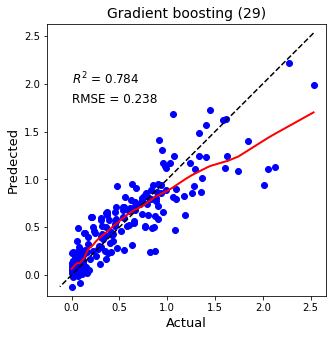

In [27]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o', linewidth=1)
plt.yscale('linear')
plt.xscale('linear')


p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], c='black', linestyle='dashed')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.784', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.238', fontsize = 12)
plt.title('Gradient boosting (29)', fontsize = 14)

# Draw a Loess best-fit line over the scatter plot
lowess = sm.nonparametric.lowess
loess_fit = lowess(y_pred, y_test, frac=0.3)
# Plot the loess fit line on the scatter plot
plt.plot(loess_fit[:, 0], loess_fit[:, 1], 'r-', linewidth=2)

plt.show()

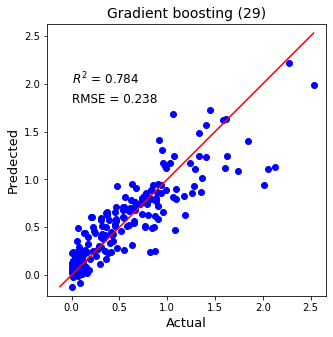

In [28]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'red')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.784', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.238', fontsize = 12)
plt.title('Gradient boosting (29)', fontsize = 14)
plt.show()

In [22]:
#Randomize search CV
from sklearn.model_selection import RandomizedSearchCV

In [23]:
# creatting parameter gride
param_grid_regressor= {'loss': ['ls', 'lad', 'huber', 'quantile'],
                       'n_estimators':[50, 100, 150, 200, 300, 400], 
    'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25],   'criterion': ['friedman_mse', 'mse', 'mae'],
                       'min_samples_split': [1.0,2,3,4], 
                     'min_samples_leaf': [1,2,3,4], 'max_depth' : [1,2,3,4,5] }

In [24]:
print (param_grid_regressor)

{'loss': ['ls', 'lad', 'huber', 'quantile'], 'n_estimators': [50, 100, 150, 200, 300, 400], 'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25], 'criterion': ['friedman_mse', 'mse', 'mae'], 'min_samples_split': [1.0, 2, 3, 4], 'min_samples_leaf': [1, 2, 3, 4], 'max_depth': [1, 2, 3, 4, 5]}


In [25]:
regressor_random = RandomizedSearchCV(estimator = regressor, param_distributions=param_grid_regressor, n_iter = 100,
                              cv = 5, verbose =2,
                              n_jobs= -1, scoring = 'neg_mean_squared_error' )

In [26]:
regressor_random.fit (x,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingRegressor(n_estimators=300,
                                                       random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25],
                                        'loss': ['ls', 'lad', 'huber',
                                                 'quantile'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1.0, 2, 3, 4],
                                        'n_estimators': [50, 100, 150, 200, 300,
                                                         400]},
     

In [27]:
regressor_random.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_depth': 3,
 'loss': 'huber',
 'learning_rate': 0.15,
 'criterion': 'mse'}

In [28]:
regressor_random.best_score_

-0.1743108828120685

In [30]:
# parameter tuning grid searchCV
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid_regressor1= {'loss': ['ls', 'lad'],
                       'n_estimators':[ 50, 100, 150], 
    'learning_rate': [0.1, 0.15, 0.2], 'min_samples_split': [1,2,3], 
                     'min_samples_leaf': [3,4,5], 'max_depth' : [4,5,6] }

In [32]:
regressor_grid = GridSearchCV(estimator =regressor, param_grid=param_grid_regressor1,
                              cv = 5, verbose = 2,
                              n_jobs= -1,  scoring = "neg_mean_squared_error")

In [33]:
regressor_grid.fit (x,y)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


C:\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [           nan            nan            nan -2175.26531584
 -2220.46748472 -2248.09783574 -2175.26531584 -2220.46748472
 -2248.09783574            nan            nan            nan
 -2072.60748024 -2159.30790377 -2184.9706945  -2072.60748024
 -2159.30790377 -2184.9706945             nan            nan
            nan -1960.45807426 -1966.85216013 -1984.53932519
 -1960.45807426 -1966.85216013 -1984.53932519            nan
            nan            nan -2295.88508853 -2339.07482426
 -2350.87050869 -2295.88508853 -2339.07482426 -2350.87050869
            nan            nan            nan -2228.33726308
 -2297.6096316  -2303.52761669 -2228.33726308 -2297.6096316
 -2303.52761669            nan            nan            nan
 -2149.8033336  -2207.75359876 -2218.44072645 -2149.8033336
 -2207.75359876 -2218.44072645            nan            nan
            nan -2

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'learning_rate': [0.1, 0.15, 0.2],
                         'loss': ['ls', 'lad'], 'max_depth': [4, 5, 6],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=2)

In [34]:
regressor_grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'lad',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [61]:
regressor_grid.best_score_

-1631.0710092729037